# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.184438e+01     6.620380e+00
 * time: 0.004992008209228516
     1     3.021348e+01     5.523607e+00
 * time: 0.014489889144897461
     2     2.997651e+01     1.266602e+01
 * time: 0.03708600997924805
     3     2.248417e+01     9.480518e+00
 * time: 0.06451582908630371
     4     1.297686e+01     1.478828e+00
 * time: 0.09610700607299805
     5     1.290768e+01     3.659432e+00
 * time: 0.11551499366760254
     6     1.223557e+01     2.701267e+00
 * time: 0.13361787796020508
     7     1.135218e+01     2.107432e+00
 * time: 0.15196681022644043
     8     1.020452e+01     2.286553e+00
 * time: 0.17023491859436035
     9     9.467969e+00     1.249182e+00
 * time: 0.1883089542388916
    10     9.177191e+00     8.016330e-01
 * time: 0.20709991455078125
    11     8.954568e+00     7.698104e-01
 * time: 0.22687983512878418
    12     8.834760e+00     8.806446e-01
 * time: 0.24049091339111328
    13     8.757804e+00     8.049069e-01
 * time

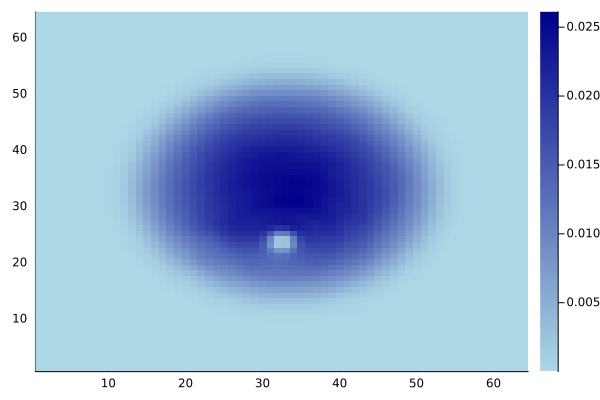

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)